In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [34]:
df = pd.read_csv('salary.csv')

In [35]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0,0.5,'Income')

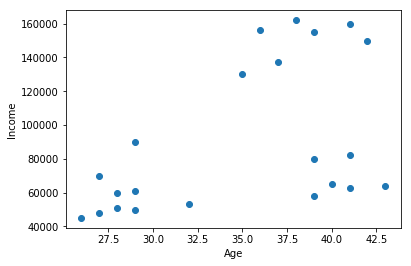

In [36]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [37]:
km = KMeans(n_clusters=3)

In [38]:
y_predicted = km.fit_predict(df[['Age','Income($)']])

In [39]:
df['cluster'] = y_predicted

In [40]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

<function matplotlib.pyplot.legend(*args, **kwargs)>

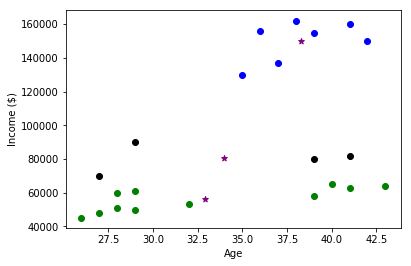

In [41]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend

In [44]:
scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)'] = scalar.transform(df[['Income($)']])
scalar.fit(df[['Age']])
df['Age'] = scalar.transform(df[['Age']])

In [45]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


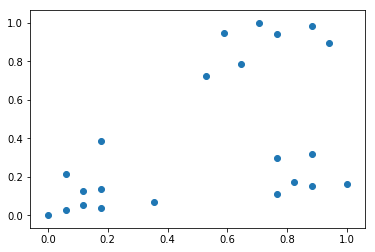

In [46]:
plt.scatter(df.Age,df['Income($)'])

In [48]:
km =KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])

In [49]:
df['cluster'] = y_predicted

In [50]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [51]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

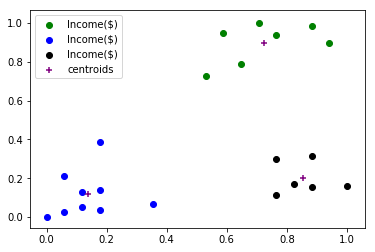

In [62]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroids')
plt.legend()

Elbow Plot

In [65]:
elbow =[]
cluster_range = range(1,10)
for k in cluster_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    elbow.append(km.inertia_)

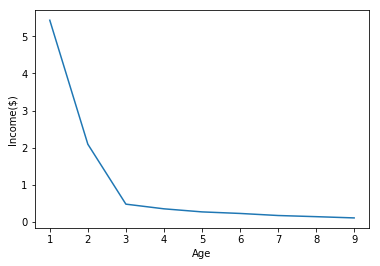

In [68]:
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.plot(cluster_range,elbow)